## Statistical-Analysis Project

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df_house=pd.read_csv('train.csv')

In [3]:
df_house = df_house.replace(0,np.nan)


#Review columns to determine which columns have a high portion of NaN values
def reviewNanCols(df,max_nan_cols):
    to_drop=[]
    for col in df.columns:
        nulls=int(df[col].isna().sum())
        if nulls > max_nan_cols:
            to_drop.append(col)
    return to_drop

#Drop columns with high portion of Nan values
def dropNanCols(col_lst):
    return df_house.drop(col_lst, axis=1)

#Reassign the DataFrame variable to save the object after columns removal
df_house=dropNanCols(reviewNanCols(df_house,200))

#Drop records with NaN Values, saves the output to df_clean
df_clean=df_house.dropna(how='any')
df_clean.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,1710,2.0,3.0,1.0,Gd,8,Typ,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,1262,2.0,3.0,1.0,TA,6,Typ,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,1786,2.0,3.0,1.0,Gd,6,Typ,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,1717,1.0,3.0,1.0,Gd,7,Typ,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,2198,2.0,4.0,1.0,Gd,9,Typ,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,64.0,796.0,GasA,Ex,Y,SBrkr,796,1362,1.0,1.0,1.0,TA,5,Typ,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,1694,2.0,3.0,1.0,Gd,7,Typ,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,2090,2.0,3.0,1.0,TA,7,Typ,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,952.0,952.0,GasA,Gd,Y,FuseF,1022,1774,2.0,2.0,2.0,TA,8,Min1,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,140.0,991.0,GasA,Ex,Y,SBrkr,1077,1077,1.0,2.0,2.0,TA,5,Typ,Attchd,1939.0,RFn,1.0,205.0,Gd,TA,Y,1,2008,WD,Normal,118000


In [4]:
df_clean.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
GrLivArea          int64


In [5]:
#separate variables into new data frames one for numeric data and one for categorical data
house_num_data = df_clean.select_dtypes(include=[np.number])
house_cat_data = df_clean.select_dtypes(exclude=[np.number])


## Analyzing the correlation of numerical variables and Sale price

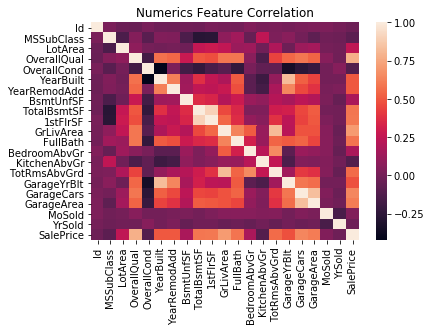

In [6]:
#correlation plot will help us identify which numeric variables are strongly correlated with
#the House price
corr = house_num_data.corr()
ax = plt.axes()
sns.heatmap(corr, ax = ax)
ax.set_title('Numerics Feature Correlation')
plt.show()

In [7]:
#Identify the numeric correlation scores from the graph. Listing the top 15 in descending order 
#and the bottom 5 in descending order
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n')
print ('_________________________________________________')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) 

SalePrice       1.000000
OverallQual     0.781410
GrLivArea       0.710924
GarageCars      0.639799
GarageArea      0.609048
1stFlrSF        0.600081
TotalBsmtSF     0.594493
FullBath        0.584200
TotRmsAbvGrd    0.556148
YearBuilt       0.503172
YearRemodAdd    0.500473
GarageYrBlt     0.478535
LotArea         0.248049
BsmtUnfSF       0.177009
BedroomAbvGr    0.174418
Name: SalePrice, dtype: float64 

_________________________________________________
YrSold         -0.017065
Id             -0.025775
MSSubClass     -0.078227
KitchenAbvGr   -0.112644
OverallCond    -0.112871
Name: SalePrice, dtype: float64


In [8]:
#Since the OverallQual feature has the stronger correlation with SalePrice we are going to
#analyze the OveralQual column values and determine the mean Sales Price according to the 
#unique values in OverllQual using a pivot table.

pivot = df_clean.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot.sort_values(by='OverallQual',ascending=False)

,SalePrice
OverallQual,
10,426000.0
9,343821.5
8,269750.0
7,201000.0
6,162250.0
5,134500.0
4,112000.0
3,100000.0


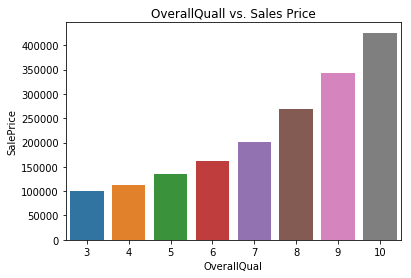

In [9]:
fig= sns.barplot(x=pivot.index, y="SalePrice", data=pivot)
plt.title("OverallQuall vs. Sales Price")
plt.show(fig)

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


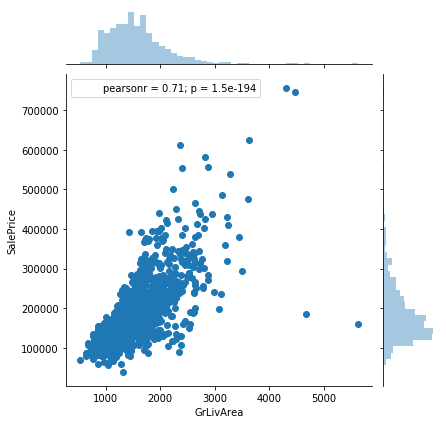

In [10]:
#Now let's plot the relationship between 'GrLivArea' and 'SalePrice'
sns.jointplot(x=df_clean['GrLivArea'], y=df_clean['SalePrice']).annotate(stats.pearsonr)

## Analyzing the correlation of Categorical variables and Sale price
To understand the correlation between categorical variables and SalePrice we are going to use ANOVA test.

Our Hypothesis:

Ho - There exists no significant difference between the groups. 

Ha - There exists a significant difference between the groups.

In [11]:
cat = [f for f in df_clean.columns if df_clean.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

house_cat_data['SalePrice'] = df_clean.SalePrice.values
k = anova(house_cat_data) 
#The higher the disparity score, the more we know the feature is a good 
#predictor of sale price (might be a used feature)
k['disparity'] = np.log(1./k['pval'].values) 
k.head(5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,features,pval,disparity
7,Neighborhood,1.184050e-179,411.993791
20,BsmtQual,1.357220e-165,379.621102
17,ExterQual,4.949781e-165,378.327197
29,KitchenQual,7.537998e-159,364.091073
32,GarageFinish,6.528050e-83,189.238454


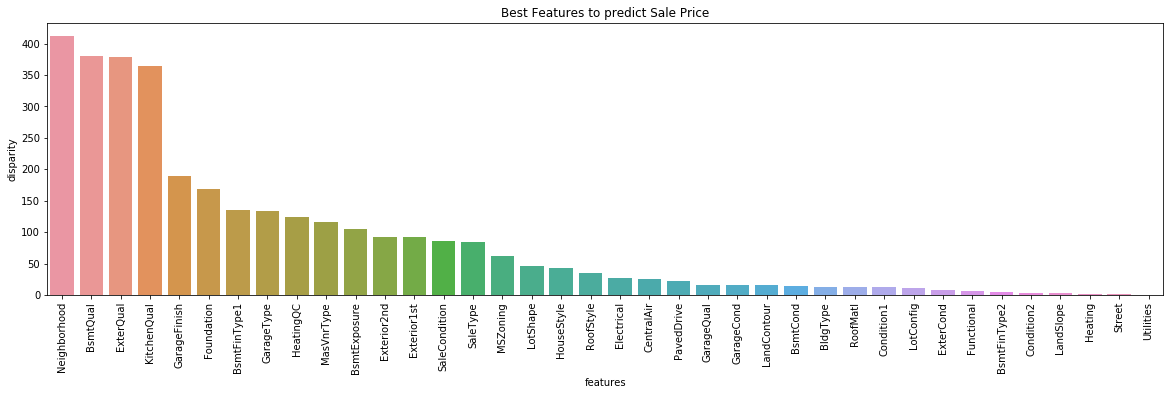

In [12]:
plt.figure(figsize=(20,5))
fig= sns.barplot(x="features", y="disparity", data=k)
plt.title("Best Features to predict Sale Price")
plt.xticks(rotation=90) 

plt.show(fig)

In [14]:
for col_name in house_cat_data.columns:
    if(house_cat_data[col_name].dtype == 'object'):
        house_cat_data[col_name]= house_cat_data[col_name].astype('category')
        house_cat_data[col_name] = house_cat_data[col_name].cat.codes


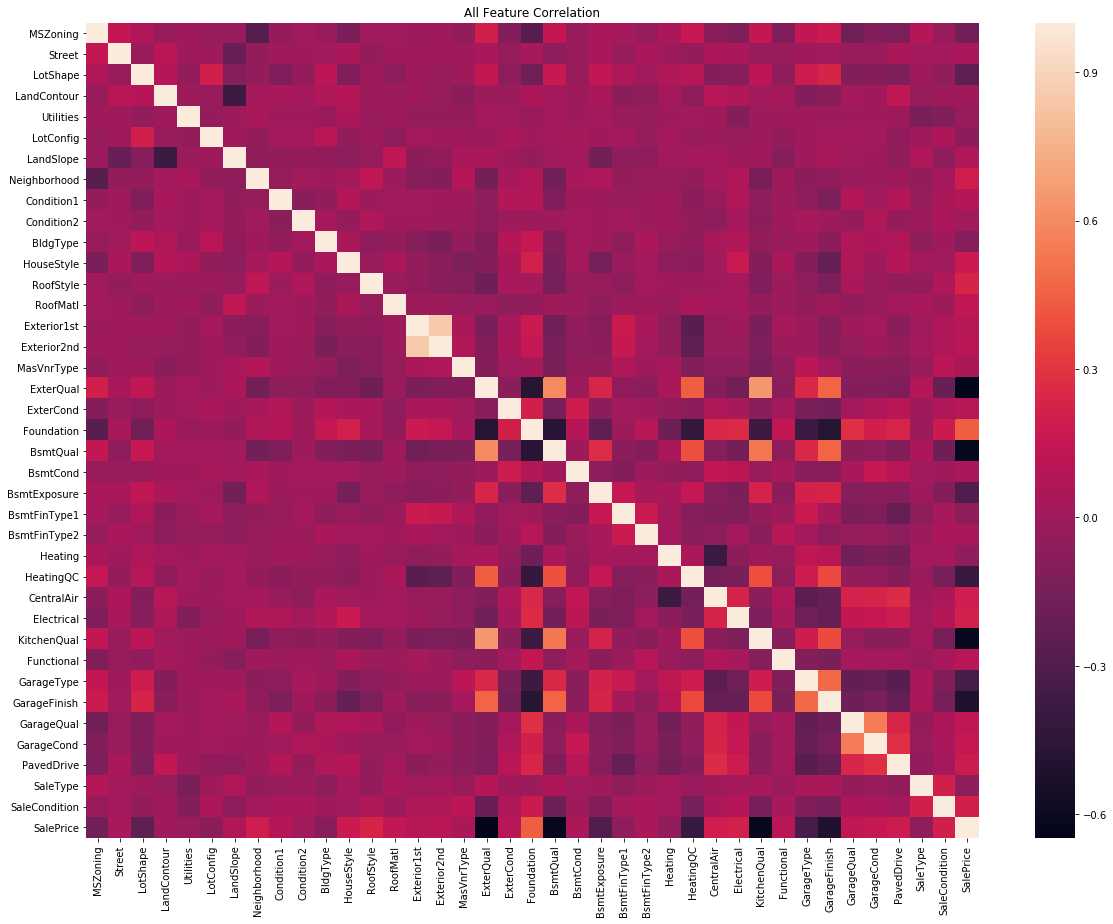

In [15]:
corr_cat = house_cat_data.corr()
plt.figure(figsize=(20,15))
ax = plt.axes()
sns.heatmap(corr_cat, ax = ax)
ax.set_title('All Feature Correlation')
plt.show()

In [16]:
print (corr_cat['SalePrice'].sort_values(ascending=False)[:15], '\n')

SalePrice        1.000000
Foundation       0.445302
RoofStyle        0.228488
Electrical       0.211210
SaleCondition    0.208388
Neighborhood     0.199677
CentralAir       0.192655
PavedDrive       0.179926
HouseStyle       0.173248
GarageCond       0.154119
RoofMatl         0.131287
GarageQual       0.125604
Functional       0.104641
Exterior2nd      0.102978
ExterCond        0.098504
Name: SalePrice, dtype: float64 



In [17]:
pivot = house_cat_data.pivot_table(index='Foundation', values='SalePrice', aggfunc=np.median)
pivot.sort_values(by='Foundation',ascending=False)

,SalePrice
Foundation,
4,153500
3,126500
2,209500
1,144700
0,129900


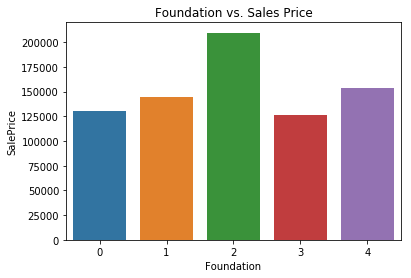

In [31]:
#Now let's plot the relationship between 'Foundation' and 'SalePrice'
fig= sns.barplot(x=pivot.index, y="SalePrice", data=pivot)
plt.title("Foundation vs. Sales Price")
plt.show(fig)